# Boston House Price Prediction

## Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

### Which noteworthy trends of features and relations between features as well as features and regression target do you see?

* CRIM:
    * per capita crime rate by town
* ZN:
    * proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS:
    * proportion of non-retail business acres per town
* CHAS:
    * Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX:
    * nitric oxides concentration (parts per 10 million)
* RM:
    * average number of rooms per dwelling
* AGE:
    * proportion of owner-occupied units built prior to 1940
* DIS:
    * weighted distances to five Boston employment centres
* RAD:
    * index of accessibility to radial highways
* TAX:
    * full-value property-tax rate per 10,000
* PTRATIO:
    * pupil-teacher ratio by town
* B:
    * 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT:
    * % lower status of the population
* MEDV (TAGET):
    * Median value of owner-occupied homes in $1000's

In [28]:
import pandas as pd
#Loading the dataset using sklearn library
from sklearn.datasets import load_boston

df = pd.read_csv("housing.csv", sep="\s+",
                 names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"],
                 header=None)

df.describe() # list some statistics for the features in the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 506 entries, (0.00632, 18.0, 2.31) to (0.04741, 0.0, 11.93)
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ZN       506 non-null    int64  
 1   INDUS    506 non-null    float64
 2   CHAS     506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    int64  
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  MEDV     506 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 69.5 KB


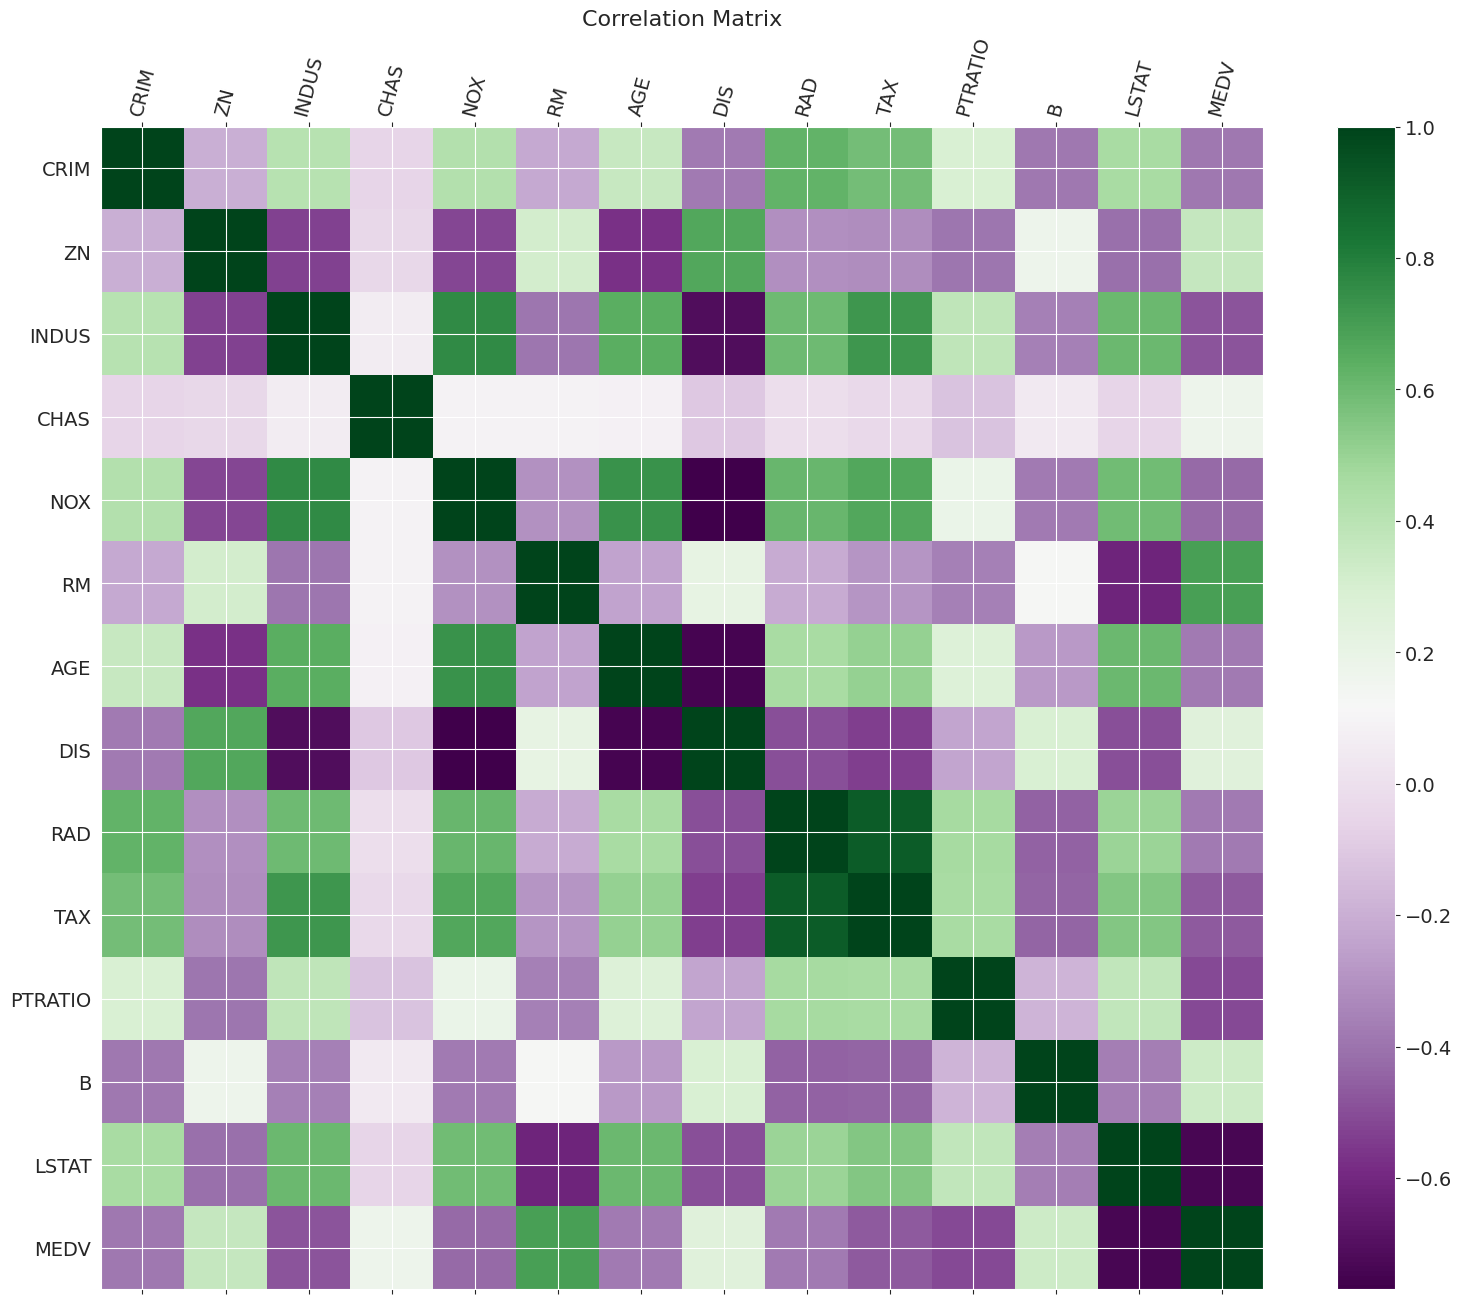

In [41]:
import utils
utils.piggy_matrix(df)

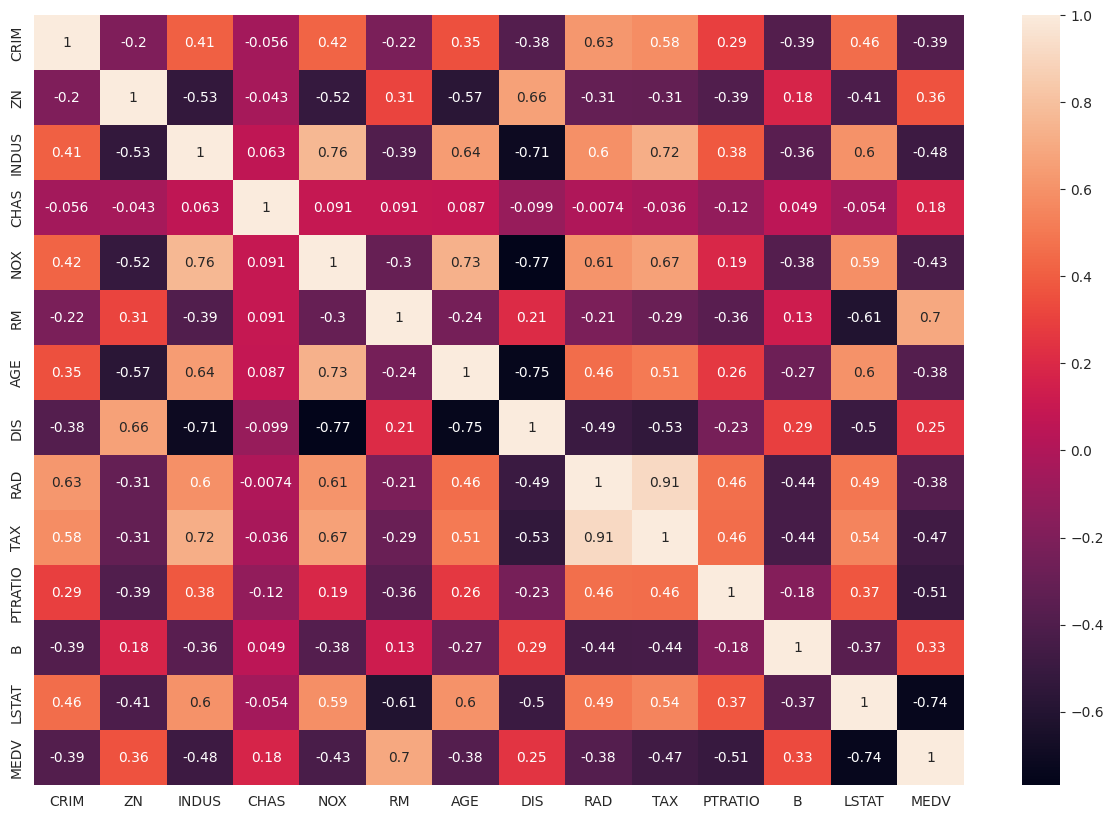

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

It makes sense, that the `MEDV` correlates negatively with the `CRIM`, since demand for houses in areas with high crime rate would be lower than in those with lower rates.
It also makes sense, that the prices in low crime rate areas fluctuate more than in those with higher crime rate, since this relation does not factor in other factors.

StopIteration: 

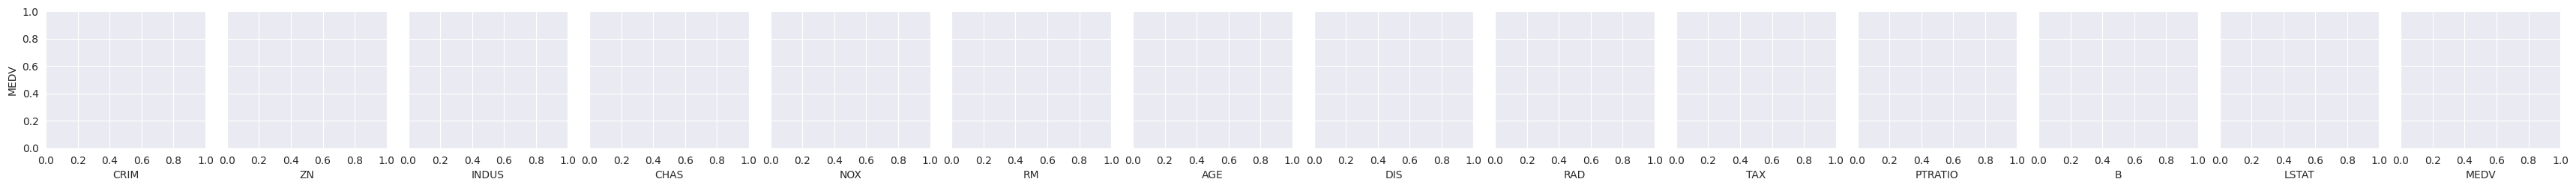

In [62]:
sns.pairplot(data=df, x_vars=df.columns, y_vars=["MEDV"])

In [69]:
sns.lmplot(df, x=df.columns, y="MEDV")

/home/fabian/fh/ml/notebooks/venv/lib/python3.10/site-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

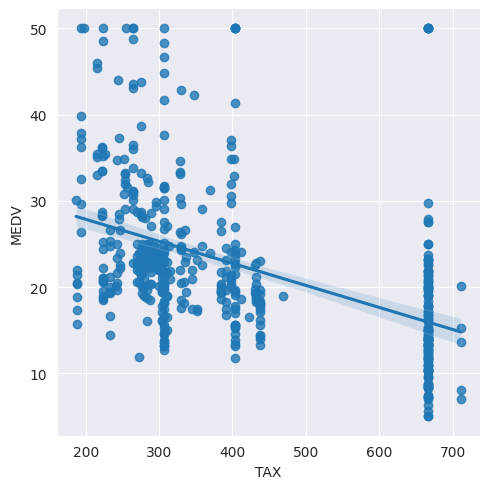

In [58]:
sns.lmplot(df, x="TAX", y="MEDV")

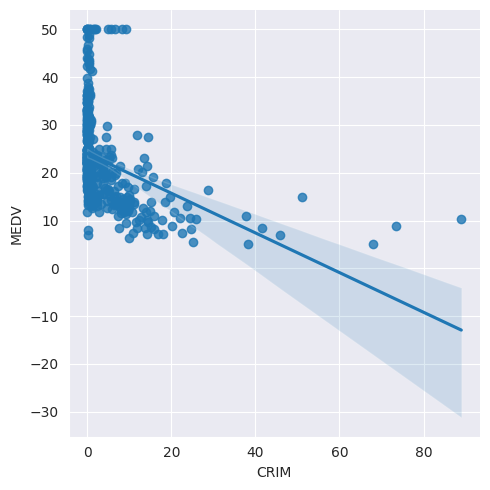

In [56]:
sns.lmplot(df, x="LSTAT", y="MEDV")


### Which features would you choose to train the regression models, any why?


## Build up your ML toolchain for this regression problem similar to the one
you did for the classification and again take care of the following points:
* Data and Feature Preprocessing (if necessary and applicable)
* Train/Test split
* Use the following Regression models with different hyperparemter
settings (where applicable) and an appropriate cross-validation setup
for your training:
    * Linear Regression
    * Polynomial Regression
    * Logistic Regression
* Estimate the models’ performances on the test set again with two
different error/performance measurements
* Explain which model you would use in deployment and why